In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sn
from sklearn.preprocessing import MultiLabelBinarizer
%config InlineBackend.figure_formats = ['retina'] 

In [2]:
data_assignment = pd.read_csv("data/assignment_red.csv")
data_assignor = pd.read_csv("data/assignor_red.csv")
data_assignee = pd.read_csv("data/assignee_red.csv")
data_documentid = pd.read_csv("data/documentid_red.csv")

data_patents = pd.read_pickle('../info_patents')

#same dataframe with good Processing time values 
#some process_time_value where dates instead of int
data_patents_process = data_patents[data_patents['patent_processing_time'].apply(lambda x: str(x).isdigit())]
data_patents_process.patent_processing_time = data_patents_process.patent_processing_time.astype(int)
#data_patents_process = data_patents_process[data_patents_process['patent_processing_time'].apply(lambda x: x<20000)]

/Users/gregoirebellan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [3]:
data_patents = data_patents.dropna()
s = data_patents['ipc_section']
mlb = MultiLabelBinarizer()
test = pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=data_patents.index)

test = test[['A','B','C','D','E','F','G','H']]
for i in list(test.columns) :
    data_patents[i] = test[i]

In [4]:
rf_id = data_assignment['rf_id']
data = data_assignment.copy()
data = data.join(data_assignee.set_index('rf_id'), on='rf_id')
data = data.join(data_assignor.set_index('rf_id'), on='rf_id')
data = data.join(data_documentid.set_index('rf_id'), on='rf_id')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20795 entries, 0 to 5834
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rf_id           20795 non-null  int64  
 1   file_id         20795 non-null  int64  
 2   cname           20795 non-null  object 
 3   caddress_1      20795 non-null  object 
 4   caddress_2      20795 non-null  object 
 5   caddress_3      12649 non-null  object 
 6   caddress_4      1335 non-null   object 
 7   reel_no         20795 non-null  int64  
 8   frame_no        20795 non-null  int64  
 9   convey_text     20795 non-null  object 
 10  record_dt       20795 non-null  object 
 11  last_update_dt  20795 non-null  object 
 12  page_count      20795 non-null  int64  
 13  purge_in        20795 non-null  object 
 14  ee_name         20795 non-null  object 
 15  ee_address_1    19669 non-null  object 
 16  ee_address_2    5307 non-null   object 
 17  ee_city         20784 non-null  

## Number of patents sold per assignor

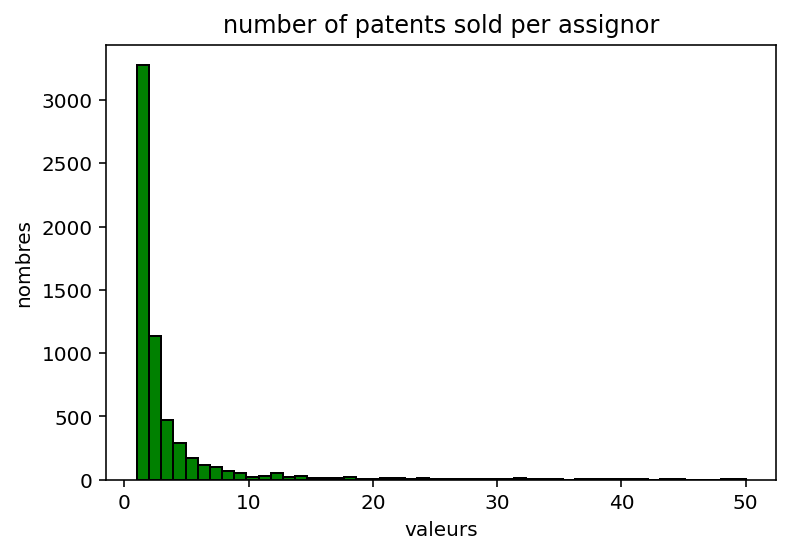

DescribeResult(nobs=6046, minmax=(1, 390), mean=3.4394641085014888, variance=86.03198409656105, skewness=18.25618805094915, kurtosis=586.130681602731)

In [6]:
plt.hist(data['or_name'].value_counts(), range = (1,50), bins = 50, color = 'green',
            edgecolor = 'black')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('number of patents sold per assignor')
plt.show()

stats.describe(data['or_name'].value_counts().to_numpy())

## Number of patents sold per assignee

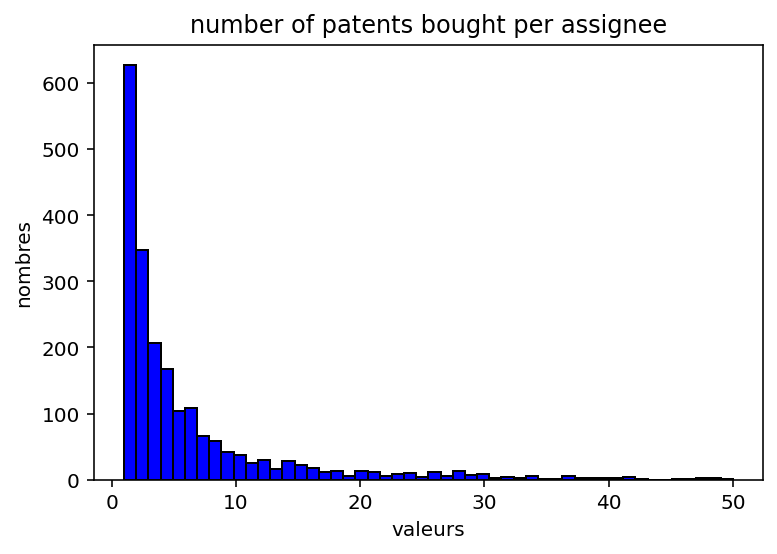

DescribeResult(nobs=2142, minmax=(1, 696), mean=9.708216619981325, variance=1010.9381762669258, skewness=12.140803748066828, kurtosis=198.37016358703715)

In [7]:
plt.hist(data['ee_name'].value_counts(), range = (1,50), bins = 50, color = 'blue',
            edgecolor = 'black')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('number of patents bought per assignee')
plt.show()

stats.describe(data['ee_name'].value_counts().to_numpy())

## Number of transactions with the same assignor/assignee

In [8]:
data['or_ee'] = data['or_name'] + data['ee_name']

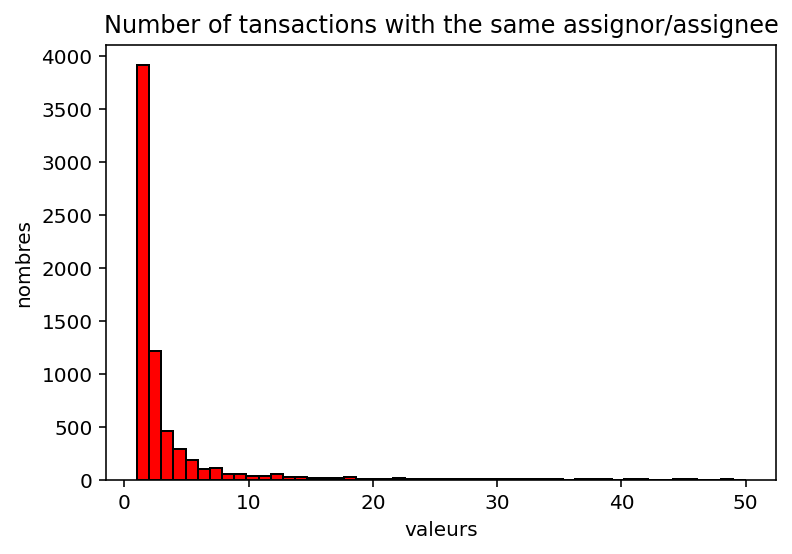

DescribeResult(nobs=6746, minmax=(1, 316), mean=3.082567447376223, variance=59.516235720060976, skewness=15.787077627428788, kurtosis=464.8336921322916)

In [9]:
plt.hist(data['or_ee'].value_counts(), range = (1,50), bins = 50, color = 'red',
            edgecolor = 'black')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('Number of tansactions with the same assignor/assignee')
plt.show()

stats.describe(data['or_ee'].value_counts().to_numpy())

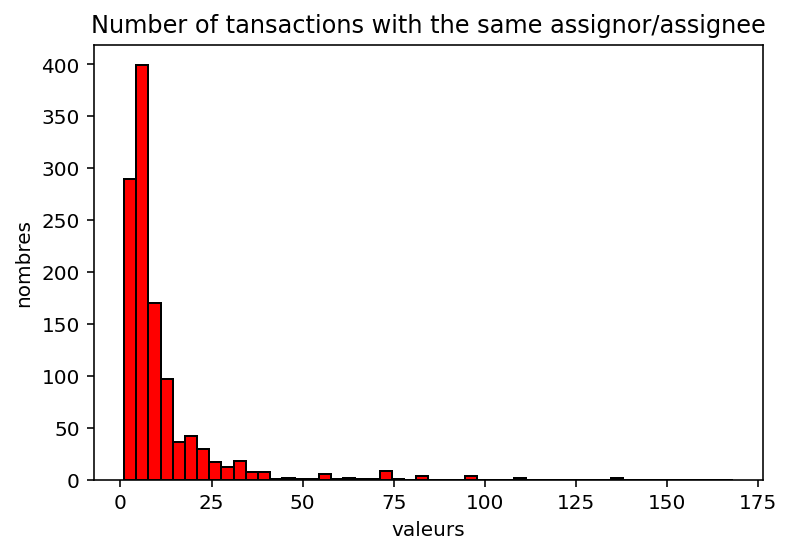

In [10]:
value_count = data['or_ee'].value_counts()
res = []
for i in range (len(value_count)):
    if value_count[i]>3 : 
        res.append(value_count[i])

plt.hist(res, range = (1,168), bins = 50, color = 'red',edgecolor = 'black')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('Number of tansactions with the same assignor/assignee')
plt.show()

## Number of transactions with the same patent

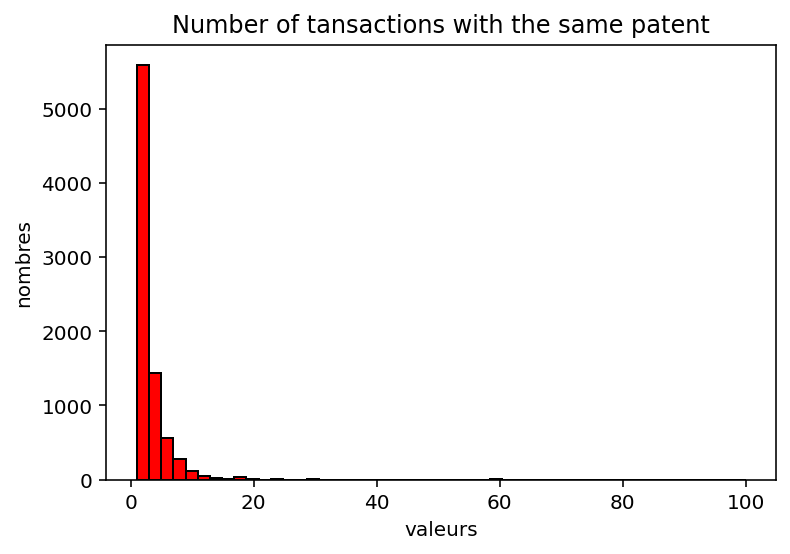

DescribeResult(nobs=8113, minmax=(1, 60), mean=2.563170220633551, variance=8.718426437614065, skewness=6.176965828374427, kurtosis=74.00897278937026)

In [11]:
plt.hist(data['grant_doc_num'].value_counts(), range = (1,100), bins = 50, color = 'red',
            edgecolor = 'black')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('Number of tansactions with the same patent')
plt.show()

stats.describe(data['grant_doc_num'].value_counts().to_numpy())

We can see here that a patent that is traded is in average traded 6 times. 

============================================================================================

# All patents

In [12]:
data_patents['marked'].value_counts()

0.0    1800785
1.0      23266
Name: marked, dtype: int64

## Proportion of marked patents

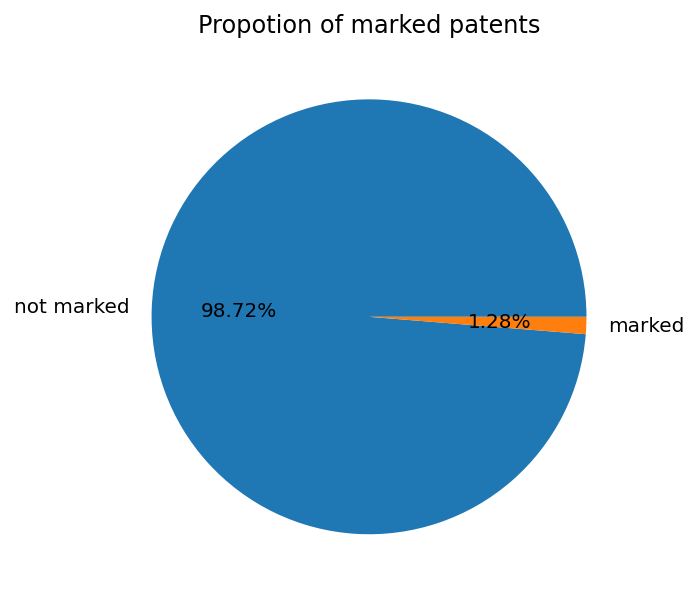

In [13]:
plt.figure(figsize=(5,5))
plt.pie(x = data_patents['marked'].value_counts(), labels = ['not marked','marked'], autopct='%1.2f%%')
plt.title('Propotion of marked patents')
plt.show()

## Processing Time for patents 

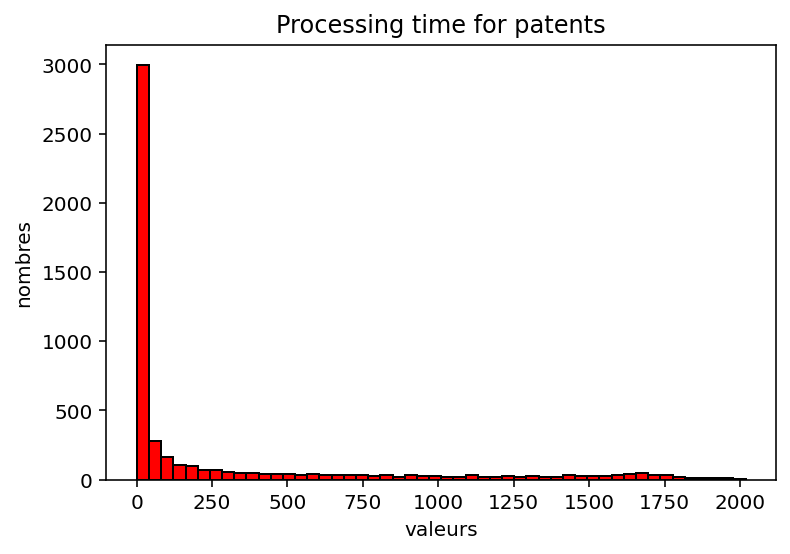

In [14]:
plt.hist(data_patents_process['patent_processing_time'].value_counts(), range = (1,2018), bins = 50, color = 'red',
            edgecolor = 'black')

plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('Processing time for patents')
plt.show()

In [15]:
data_patents_process['patent_processing_time'].describe()

count    1.396111e+06
mean     1.046556e+03
std      6.163182e+02
min      0.000000e+00
25%      6.200000e+02
50%      9.070000e+02
75%      1.328000e+03
max      3.381700e+04
Name: patent_processing_time, dtype: float64

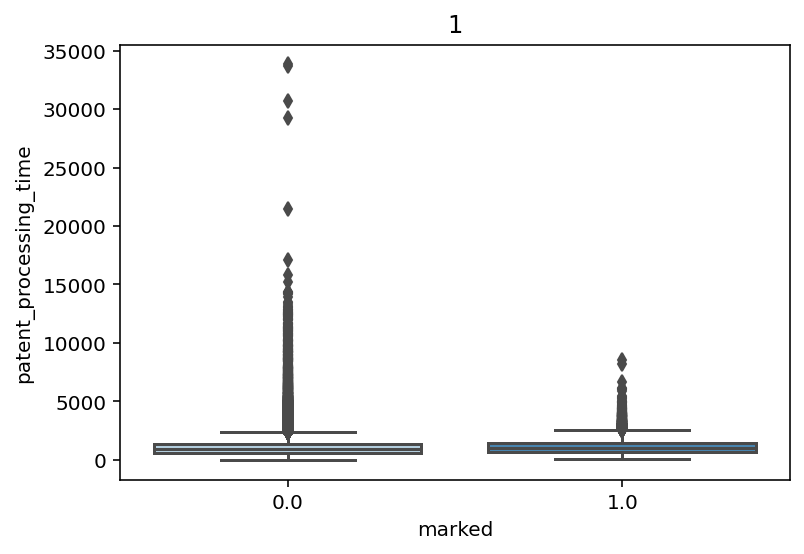

In [16]:
ax = sn.boxplot(x="marked", y="patent_processing_time", palette="Blues", data=data_patents_process).set_title("1")
                                                                                                                                                                                    

Here we see that the max is higher when the patent is not marked 

In [17]:
data_patents_process['patent_processing_time'].describe()

count    1.396111e+06
mean     1.046556e+03
std      6.163182e+02
min      0.000000e+00
25%      6.200000e+02
50%      9.070000e+02
75%      1.328000e+03
max      3.381700e+04
Name: patent_processing_time, dtype: float64

the processing time is in more than 50% of the time between 600 and 1400 days (the average being 1046 days) 

In [164]:
data_patents_process = data_patents[data_patents['patent_processing_time'].apply(lambda x: str(x).isdigit())]
data_patents_process['patent_processing_time'] = data_patents_process['patent_processing_time'].astype(int)

<ipython-input-164-7a712afcf706>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_patents_process['patent_processing_time'] = data_patents_process['patent_processing_time'].astype(int)


In [165]:
data_patents_process['patent_date'] = pd.to_datetime(data_patents_process['patent_date'], format='%Y-%m-%d', errors='coerce')
data_patents_process.dropna()

<ipython-input-165-2d7efb1914e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_patents_process['patent_date'] = pd.to_datetime(data_patents_process['patent_date'], format='%Y-%m-%d', errors='coerce')


,patent_number,patent_date,patent_processing_time,ipc_section,assignee_id,wipos,marked,A,B,C,D,E,F,G,H
0,5387603,1995-02-07,433,"[A, C]",[5330279e-a21e-438c-80d1-7e6ae793c092],"[16, 14]",1.0,1,0,1,0,0,0,0,0
1,5771295,1998-06-23,552,[H],[2986e46e-7937-477f-9bc5-1f5eec05183f],[2],1.0,0,0,0,0,0,0,0,1
2,5585587,1996-12-17,832,[G],[f7152515-d420-42d9-a7b6-3a2796bc5d10],"[34, 2, 10]",1.0,0,0,0,0,0,0,1,0
3,5321490,1994-06-14,568,[G],[ec72750e-f789-4749-91f7-6292f7c6fda7],"[10, 12, 29]",1.0,0,0,0,0,0,0,1,0
4,5750497,1998-05-12,1161,"[A, C]",[9a3afa40-66e5-4921-b831-64287f2052e0],"[16, 15]",1.0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915705,8386822,2013-02-26,1852,[G],[ee0168d9-bf74-4513-bfbf-e73c933f90e7],[6],0.0,0,0,0,0,0,0,1,0
1915707,4192319,1980-03-11,893,[A],[fa543ac8-5ee8-4999-b949-6c8a3dbae65d],[13],0.0,1,0,0,0,0,0,0,0
1915708,8386739,2013-02-26,1247,[G],[ee0168d9-bf74-4513-bfbf-e73c933f90e7],[6],0.0,0,0,0,0,0,0,1,0
1915709,4191891,1980-03-04,481,[H],[f2d3dc32-b29c-4c55-ab6d-736b4ee8b96b],[13],0.0,0,0,0,0,0,0,0,1


In [166]:
# creates a columns with only years

data_patents_process["year"] = data_patents_process['patent_date']
data_patents_process['year'] = pd.DatetimeIndex(data_patents_process['patent_date']).year

<ipython-input-166-419f6100beda>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_patents_process["year"] = data_patents_process['patent_date']
<ipython-input-166-419f6100beda>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_patents_process['year'] = pd.DatetimeIndex(data_patents_process['patent_date']).year


In [185]:
df_year2.index

Int64Index([1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
            1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
            1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
            2020],
           dtype='int64', name='year')

In [180]:
new = data_patents_process.filter(['year','marked'], axis=1)
df_year=new.groupby('year').agg(['count'])
df_year2=new.groupby('year').agg(['sum'])
df_year['year'] = df_year['marked']
df_year['year'] = df_year.index

df_test = pd.DataFrame(columns = ('sum','total','year'), index = df_year.index)
print(df_test)
df_test['sum'] = df_year2['marked']
df_test['total'] = df_year['marked']
df_test['year'] = df_year['year']

      sum total year
year                
1976  NaN   NaN  NaN
1977  NaN   NaN  NaN
1978  NaN   NaN  NaN
1979  NaN   NaN  NaN
1980  NaN   NaN  NaN
1981  NaN   NaN  NaN
1982  NaN   NaN  NaN
1983  NaN   NaN  NaN
1984  NaN   NaN  NaN
1985  NaN   NaN  NaN
1986  NaN   NaN  NaN
1987  NaN   NaN  NaN
1988  NaN   NaN  NaN
1989  NaN   NaN  NaN
1990  NaN   NaN  NaN
1991  NaN   NaN  NaN
1992  NaN   NaN  NaN
1993  NaN   NaN  NaN
1994  NaN   NaN  NaN
1995  NaN   NaN  NaN
1996  NaN   NaN  NaN
1997  NaN   NaN  NaN
1998  NaN   NaN  NaN
1999  NaN   NaN  NaN
2000  NaN   NaN  NaN
2001  NaN   NaN  NaN
2002  NaN   NaN  NaN
2003  NaN   NaN  NaN
2004  NaN   NaN  NaN
2005  NaN   NaN  NaN
2006  NaN   NaN  NaN
2007  NaN   NaN  NaN
2008  NaN   NaN  NaN
2009  NaN   NaN  NaN
2010  NaN   NaN  NaN
2011  NaN   NaN  NaN
2012  NaN   NaN  NaN
2013  NaN   NaN  NaN
2014  NaN   NaN  NaN
2015  NaN   NaN  NaN
2016  NaN   NaN  NaN
2017  NaN   NaN  NaN
2018  NaN   NaN  NaN
2019  NaN   NaN  NaN
2020  NaN   NaN  NaN


In [213]:
test = df_year.marked.to_numpy().reshape(len(df_year))
print(len(test))

45


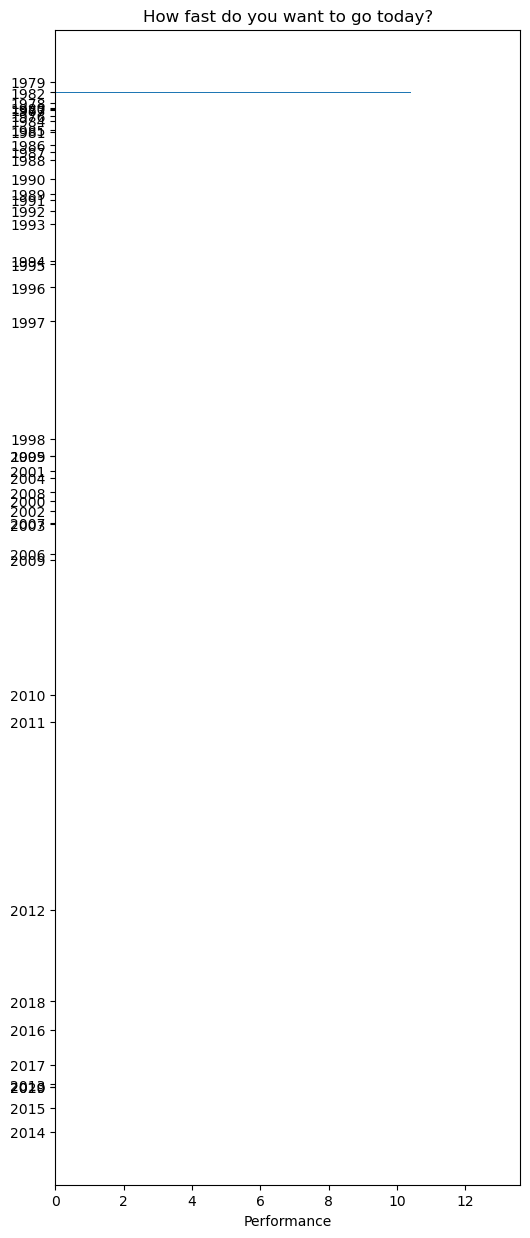

In [214]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(6, 15))

# Example data
year = df_year2.index
y_pos = np.arange(len(people))

ax.barh(test, performance, align='center')
ax.set_yticks(test)
ax.set_yticklabels(year)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

In [ ]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

sn.set_color_codes("pastel")
sn.barplot(x="total", y="year", data=df_test) #,label="Total", color="b")

sn.set_color_codes("muted")
sn.barplot(x="sum", y="year", data=df_test, label="marked", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sn.despine(left=True, bottom=True)

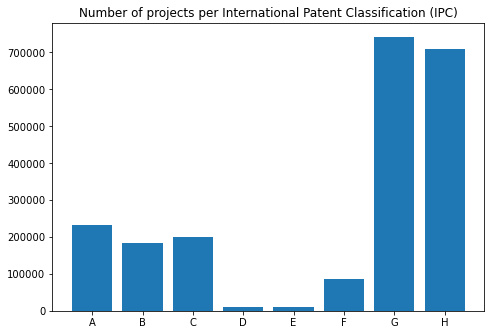

In [143]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['A', 'B', 'C', 'D', 'E', 'F','G','H']
students = [np.sum(data_patents.A),np.sum(data_patents.B),np.sum(data_patents.C),np.sum(data_patents.D),np.sum(data_patents.E),np.sum(data_patents.F),np.sum(data_patents.G),np.sum(data_patents.H)]
ax.bar(langs,students)
plt.title('Number of projects per International Patent Classification (IPC)')
plt.show()

A : HUMAN NECESSITIES

B : PERFORMING OPERATIONS; TRANSPORTING

C : CHEMISTRY; METALLURGY

D : TEXTILES; PAPER

E : FIXED CONSTRUCTIONS

F : MECHANICAL ENGINEERING; LIGHTING; HEATING; WEAPONS; BLASTING

G : PHYSICS

H : ELECTRICITY

In [129]:
data_patents = data_patents.dropna()
s = data_patents['ipc_section']
mlb = MultiLabelBinarizer()
test = pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=data_patents.index)

test = test[['A','B','C','D','E','F','G','H']]
for i in list(test.columns) :
    data_patents[i] = test[i]

<ipython-input-129-15841e22e1e6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_patents[i] = test[i]


In [ ]:
# A = Human Necessitates; B = Performing Operations; Transporting; C = Chemistry; Metallurgy, D = Textiles; Paper; E = Fixed Constructing, F = Mechanical Engineering; Lighting; Heating; Weapons; Blasting; G = Physics, H = Electricity